# Question 1

In [19]:
import numpy as np
from numpy.linalg import matrix_power
import scipy.linalg as LA
import matplotlib.pyplot as plt
from numba import vectorize, jit, njit, float64, prange


mat = np.loadtxt('/Users/alexweinberg/Desktop/BootCamp2018/ProbSets/Econ/Week2/matrix_data.txt')

lamb = LA.eigvals(mat) # compute eigenvalues
spec = np.absolute(lamb).max()
# r(X) = spec = 1.0044277694480632

In [20]:
def operator(v,X,i=int):
    '''
    ----------------------------------------
    Parameters:
    ----------------------------------------
    v    vector, n x 1
    X    matrix, n x 1
    i    integer, 1 x 1
    ----------------------------------------
    this value should converge to spec, r(X)
    ||X^i v||^(1/i) --> r(X)
    '''
    r = LA.norm(matrix_power(X,i) @ v) ** (1/i)
    dist = np.absolute(r - spec)
    return r, dist

j,jj = mat.shape
v = np.ones(j)

In [21]:
i = 1_000
r, dist = operator(v,mat,i)
dist

0.0012011304694321545

In [22]:
i = 100_000
r, dist = operator(v,mat,i)
dist

1.200420037306138e-05

# Question 2

In [23]:
@jit
def sim_ts(x0, ts_length=int):
    '''
    Simulate a time-series
    -----------------------
    x0 = initial value
    ts_length = number of times apply the difference equation
    '''
    x = x0 # initial guess
    for t in range(ts_length-1):
        # difference equation, g, is here
        x = 4 * x * (1 - x)

    return x

In [24]:
# Compile
sim_ts(0.4,10)

0.918969052370147

CPU times: user 2.5 s, sys: 14.5 ms, total: 2.52 s
Wall time: 2.54 s


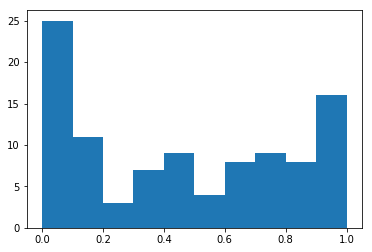

In [25]:
%%time
ts_length = 10_000_000
xknot = np.random.rand(100)
outcome = np.empty(xknot.size)

for i, x0 in enumerate(xknot):
    outcome[i] = sim_ts(x0, ts_length=ts_length)

plt.hist(outcome)

# Question 3

Because it is pointwise continuous, $$ \forall \epsilon \exists \delta,\text{s.t.} \quad |g(\hat{x}) - g(a)| < \epsilon \quad \text{when} \quad |\hat{x} - a| < \delta$$

Now, b/c limit, $\forall \epsilon$ we can choose T s.t. 
$$|g^t(x) - \hat{x}| < \epsilon \quad \text{when} \quad t > T $$

We choose T s.t. 
$$|g^t(x) - \hat{x}| < \delta $$
$$g(\lim_{t \rightarrow \infty}g^{t}(x)) = g(\hat{x}) = \hat{x}$$